# Instalacion de Dependencias

In [259]:
# Instalar dependencias
# !pip install kagglehub
# !pip install pandas
# !pip install seaborn
# !pip install seaborn scikit-learn

# Coneccion a la Dataset

In [260]:
import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("budincsevity/szeged-weather")

# Load the CSV file (assuming the main file is weatherHistory.csv based on the dataset)
df = pd.read_csv(f"{path}/weatherHistory.csv")

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263       

# Analisis Exploratorio de Datos (EDA)

In [261]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import kagglehub

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

print("📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*50)

# Información básica del dataset
print(f"📈 Forma del dataset: {df.shape}")
print(f"📊 Columnas: {list(df.columns)}")
print(f"🔍 Tipos de datos:")
print(df.dtypes)

📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA)
📈 Forma del dataset: (96453, 12)
📊 Columnas: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
🔍 Tipos de datos:
Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [262]:
# Información estadística
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS")
print("="*40)
print(df.describe())

# Verificar valores nulos
print("\n🔍 VALORES NULOS")
print("="*20)
print(df.isnull().sum())


📈 ESTADÍSTICAS DESCRIPTIVAS
       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000    

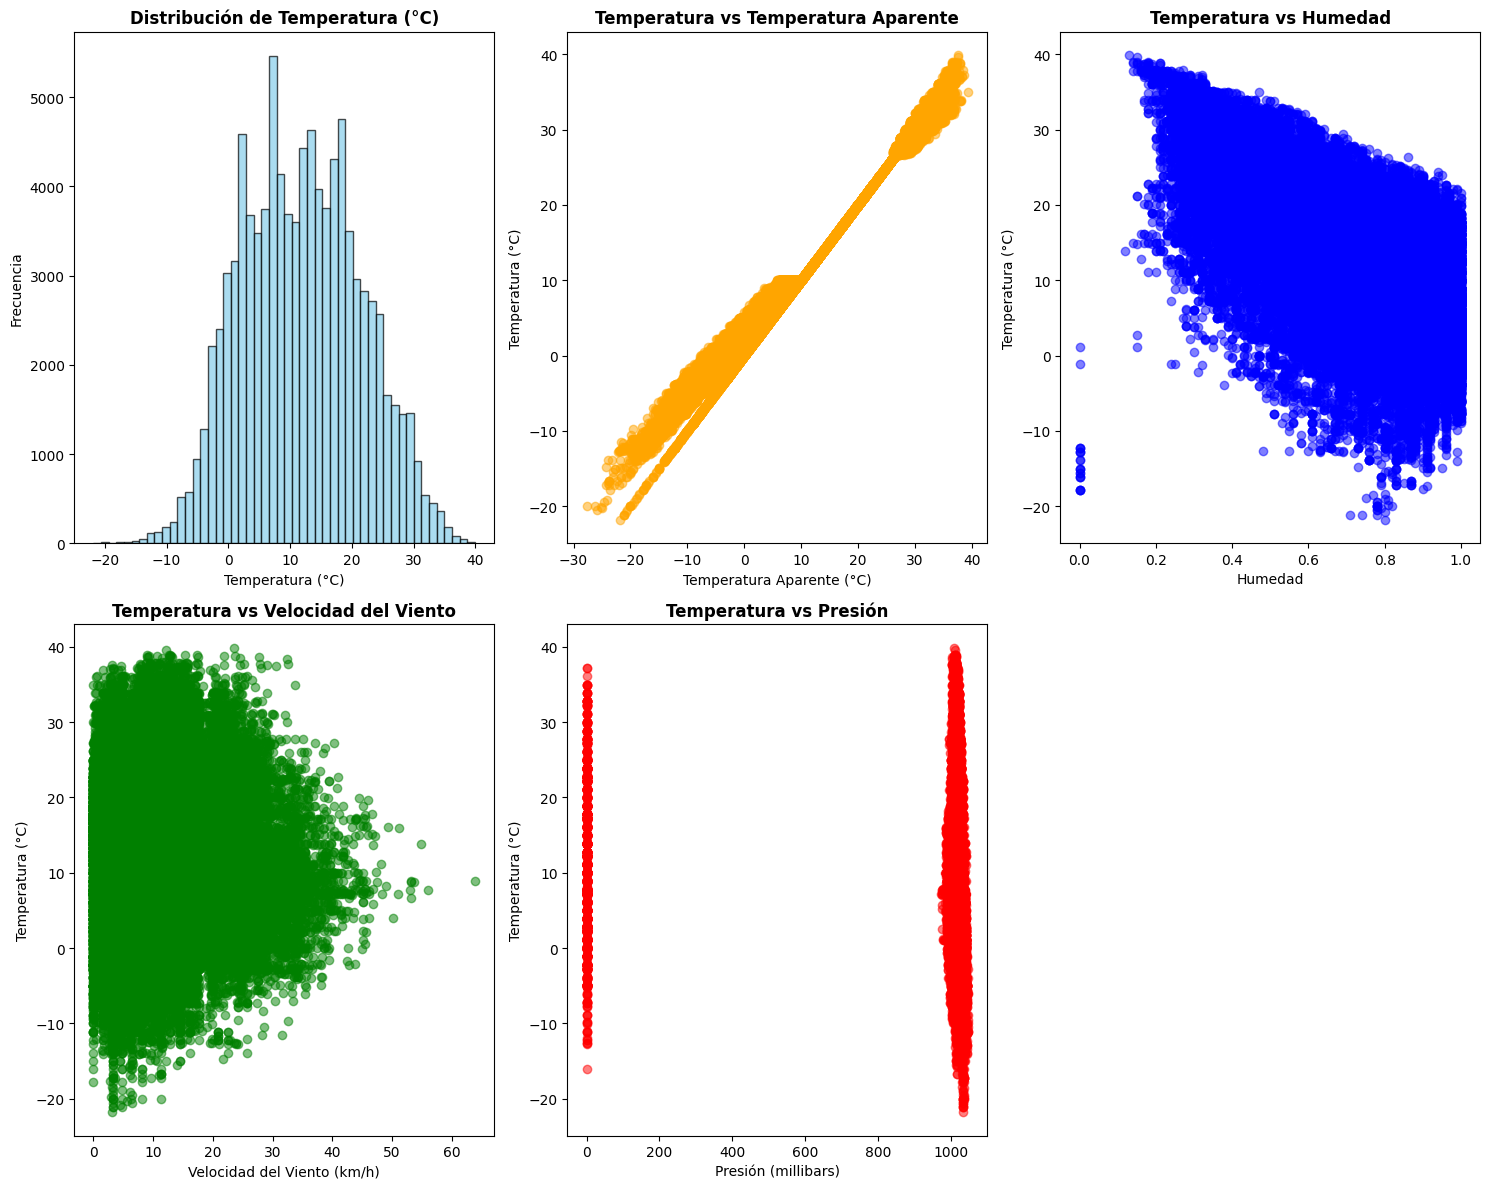

In [263]:
# Visualizaciones del EDA
plt.figure(figsize=(15, 12))

# 1. Distribución de la temperatura (variable objetivo)
plt.subplot(2, 3, 1)
plt.hist(df['Temperature (C)'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Temperatura (°C)', fontsize=12, fontweight='bold')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')

# 2. Temperatura vs Temperatura Aparente
plt.subplot(2, 3, 2)
plt.scatter(df['Apparent Temperature (C)'], df['Temperature (C)'], alpha=0.5, color='orange')
plt.title('Temperatura vs Temperatura Aparente', fontsize=12, fontweight='bold')
plt.xlabel('Temperatura Aparente (°C)')
plt.ylabel('Temperatura (°C)')

# 3. Temperatura vs Humedad
plt.subplot(2, 3, 3)
plt.scatter(df['Humidity'], df['Temperature (C)'], alpha=0.5, color='blue')
plt.title('Temperatura vs Humedad', fontsize=12, fontweight='bold')
plt.xlabel('Humedad')
plt.ylabel('Temperatura (°C)')

# 4. Temperatura vs Velocidad del Viento
plt.subplot(2, 3, 4)
plt.scatter(df['Wind Speed (km/h)'], df['Temperature (C)'], alpha=0.5, color='green')
plt.title('Temperatura vs Velocidad del Viento', fontsize=12, fontweight='bold')
plt.xlabel('Velocidad del Viento (km/h)')
plt.ylabel('Temperatura (°C)')

# 5. Temperatura vs Presión
plt.subplot(2, 3, 5)
plt.scatter(df['Pressure (millibars)'], df['Temperature (C)'], alpha=0.5, color='red')
plt.title('Temperatura vs Presión', fontsize=12, fontweight='bold')
plt.xlabel('Presión (millibars)')
plt.ylabel('Temperatura (°C)')

plt.tight_layout()
plt.show()


 MATRIZ DE CORRELACIÓN


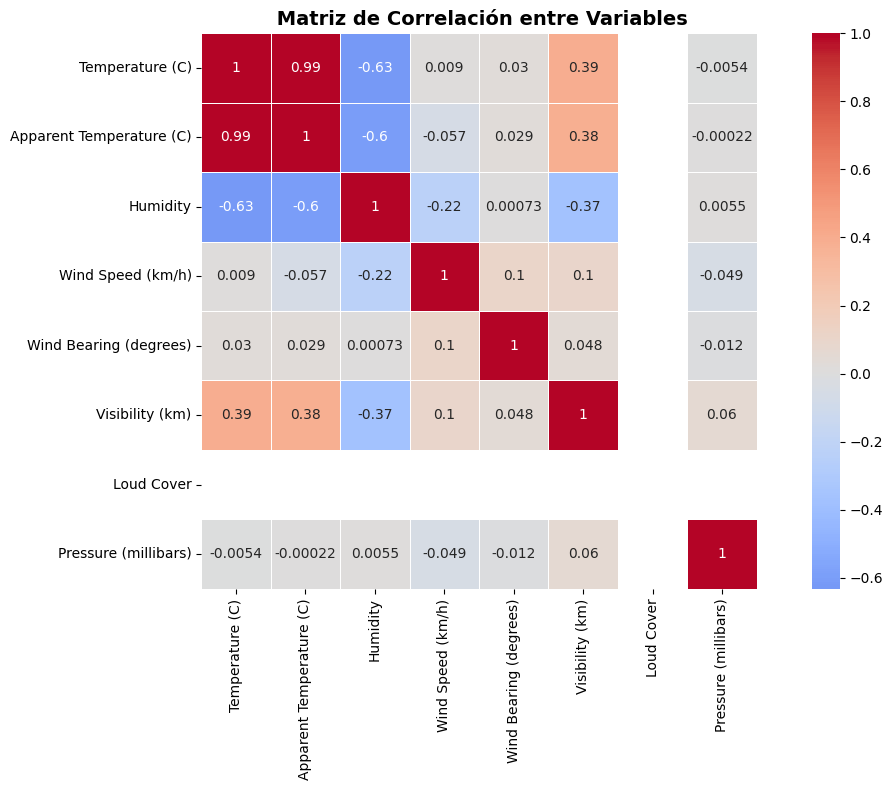


 Correlaciones con la Temperatura:
  Apparent Temperature (C): 0.993
  Visibility (km): 0.393
  Wind Bearing (degrees): 0.030
  Wind Speed (km/h): 0.009
  Pressure (millibars): -0.005
  Humidity: -0.632
  Loud Cover: nan


In [264]:
# Matriz de correlación
print("\n MATRIZ DE CORRELACIÓN")
print("="*30)

# Seleccionar solo variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title(' Matriz de Correlación entre Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones con la temperatura
print("\n Correlaciones con la Temperatura:")
temp_correlations = correlation_matrix['Temperature (C)'].sort_values(ascending=False)
for var, corr in temp_correlations.items():
    if var != 'Temperature (C)':
        print(f"  {var}: {corr:.3f}")

# Preparacion de los datos

In [265]:
print("\n🔧 PREPARACIÓN DE DATOS")
print("="*30)

# Seleccionar características para el modelo
# Usaremos las variables más correlacionadas con la temperatura
features = [
    'Apparent Temperature (C)',
]

# Eliminar filas con valores nulos en las características seleccionadas
df_clean = df[features + ['Temperature (C)']].dropna()

print(f"📊 Datos después de limpieza: {df_clean.shape}")
print(f"📈 Característica seleccionada: {features}")

# Preparar X (características) e y (objetivo)
X = df_clean[features].values
y = df_clean['Temperature (C)'].values.reshape(-1, 1)

print(f"🎯 Forma de X: {X.shape}")
print(f"🎯 Forma de y: {y.shape}")


🔧 PREPARACIÓN DE DATOS
📊 Datos después de limpieza: (96453, 2)
📈 Característica seleccionada: ['Apparent Temperature (C)']
🎯 Forma de X: (96453, 1)
🎯 Forma de y: (96453, 1)


In [266]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📚 Datos de entrenamiento: {X_train.shape}")
print(f"🧪 Datos de prueba: {X_test.shape}")

# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print("✅ Datos normalizados correctamente")

📚 Datos de entrenamiento: (77162, 1)
🧪 Datos de prueba: (19291, 1)
✅ Datos normalizados correctamente


In [267]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

print("🔥 Tensores de PyTorch creados:")
print(f"  X_train: {X_train_tensor.shape}")
print(f"  X_test: {X_test_tensor.shape}")
print(f"  y_train: {y_train_tensor.shape}")
print(f"  y_test: {y_test_tensor.shape}")

🔥 Tensores de PyTorch creados:
  X_train: torch.Size([77162, 1])
  X_test: torch.Size([19291, 1])
  y_train: torch.Size([77162, 1])
  y_test: torch.Size([19291, 1])


# Modelo de Regresion Lineal con Pytorch

In [268]:
print("\n🤖 MODELO DE REGRESIÓN LINEAL")
print("="*35)

class RegresionLinealClima(nn.Module):
    
    def __init__(self, input_size):
        super(RegresionLinealClima, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        return self.linear(x)

# Crear el modelo
input_size = len(features)  # Número de características
model = RegresionLinealClima(input_size)

print(f"🏗️ Modelo creado con {input_size} características de entrada")
print("📋 Arquitectura del modelo:")
print(model)

# Mostrar parámetros del modelo
print(f"\n🔧 Parámetros del modelo:")
for name, param in model.named_parameters():
    print(f"  {name}: {param.shape}")


🤖 MODELO DE REGRESIÓN LINEAL
🏗️ Modelo creado con 1 características de entrada
📋 Arquitectura del modelo:
RegresionLinealClima(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

🔧 Parámetros del modelo:
  linear.weight: torch.Size([1, 1])
  linear.bias: torch.Size([1])


In [269]:
# Configurar función de pérdida y optimizador
criterion = nn.MSELoss()  # Error Cuadrático Medio
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Optimizador Adam

print("⚙️ CONFIGURACIÓN DEL ENTRENAMIENTO")
print("="*40)
print(f"📉 Función de pérdida: {criterion}")
print(f"🚀 Optimizador: Adam con learning rate = 0.01")

⚙️ CONFIGURACIÓN DEL ENTRENAMIENTO
📉 Función de pérdida: MSELoss()
🚀 Optimizador: Adam con learning rate = 0.01


# Entrenamiento del Modelo

In [270]:
# Entrenar el modelo
print("\n🏋️ ENTRENAMIENTO DEL MODELO")
print("="*35)

# Configuración del entrenamiento
num_epochs = 1000
train_losses = []
test_losses = []

# Bucle de entrenamiento
for epoch in range(num_epochs):
    # Modo de entrenamiento
    model.train()
    
    # Forward pass
    y_pred_train = model(X_train_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor)
    
    # Backward pass y optimización
    optimizer.zero_grad()  # Limpiar gradientes
    train_loss.backward()  # Calcular gradientes
    optimizer.step()       # Actualizar parámetros
    
    # Evaluación en conjunto de prueba (sin gradientes)
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)
    
    # Guardar pérdidas
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Mostrar progreso cada 100 épocas
    if (epoch + 1) % 100 == 0:
        print(f"📊 Época {epoch+1:4d}/{num_epochs} | "
              f"Pérdida Entrenamiento: {train_loss.item():.6f} | "
              f"Pérdida Prueba: {test_loss.item():.6f}")

print(" Entrenamiento completado!")


🏋️ ENTRENAMIENTO DEL MODELO
📊 Época  100/1000 | Pérdida Entrenamiento: 0.014738 | Pérdida Prueba: 0.014697
📊 Época  200/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  300/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  400/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  500/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  600/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  700/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  800/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época  900/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
📊 Época 1000/1000 | Pérdida Entrenamiento: 0.014735 | Pérdida Prueba: 0.014690
 Entrenamiento completado!


# Evaluacion y Visualizacion de Resultados

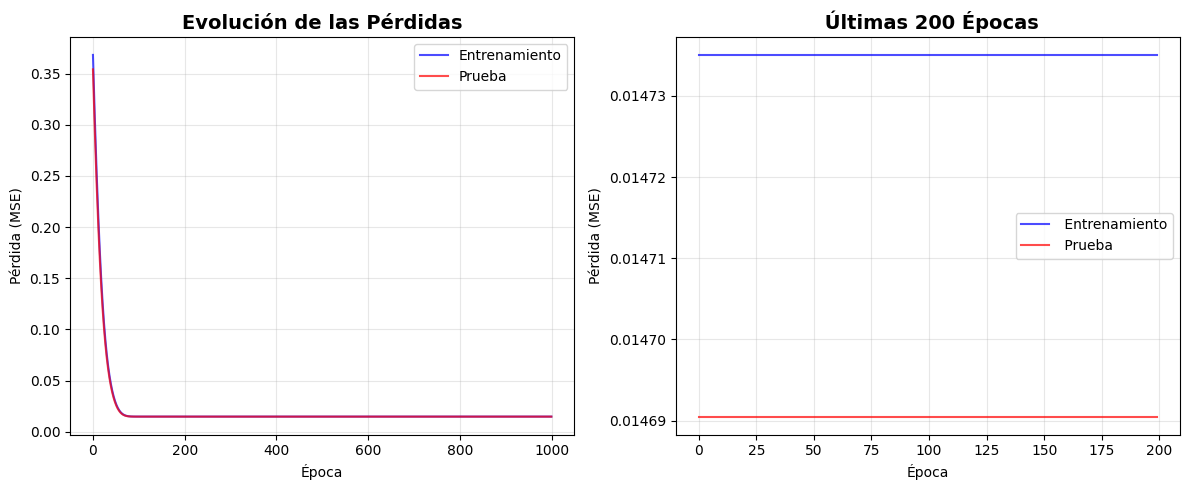

In [271]:
# Gráfica de pérdidas durante el entrenamiento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Entrenamiento', color='blue', alpha=0.7)
plt.plot(test_losses, label='Prueba', color='red', alpha=0.7)
plt.title('Evolución de las Pérdidas', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom a las últimas 200 épocas
plt.subplot(1, 2, 2)
plt.plot(train_losses[-200:], label=' Entrenamiento', color='blue', alpha=0.7)
plt.plot(test_losses[-200:], label=' Prueba', color='red', alpha=0.7)
plt.title(' Últimas 200 Épocas', fontsize=14, fontweight='bold')
plt.xlabel('Época')
plt.ylabel('Pérdida (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [272]:
# Hacer predicciones finales
model.eval()
with torch.no_grad():
    y_pred_train_final = model(X_train_tensor)
    y_pred_test_final = model(X_test_tensor)

# Convertir de vuelta a escala original
y_train_pred_original = scaler_y.inverse_transform(y_pred_train_final.numpy())
y_test_pred_original = scaler_y.inverse_transform(y_pred_test_final.numpy())
y_train_original = scaler_y.inverse_transform(y_train_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

print("\n📊 EVALUACIÓN DEL MODELO")
print("="*30)

# Calcular métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Métricas de entrenamiento
train_mse = mean_squared_error(y_train_original, y_train_pred_original)
train_mae = mean_absolute_error(y_train_original, y_train_pred_original)
train_r2 = r2_score(y_train_original, y_train_pred_original)

# Métricas de prueba
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)

print("🏋️ ENTRENAMIENTO:")
print(f"  📉 MSE: {train_mse:.4f}")
print(f"  📊 MAE: {train_mae:.4f}")
print(f"  📈 R²: {train_r2:.4f}")

print("\n🧪 PRUEBA:")
print(f"  📉 MSE: {test_mse:.4f}")
print(f"  📊 MAE: {test_mae:.4f}")
print(f"  📈 R²: {test_r2:.4f}")


📊 EVALUACIÓN DEL MODELO
🏋️ ENTRENAMIENTO:
  📉 MSE: 1.3409
  📊 MAE: 0.8823
  📈 R²: 0.9853

🧪 PRUEBA:
  📉 MSE: 1.3368
  📊 MAE: 0.8820
  📈 R²: 0.9855


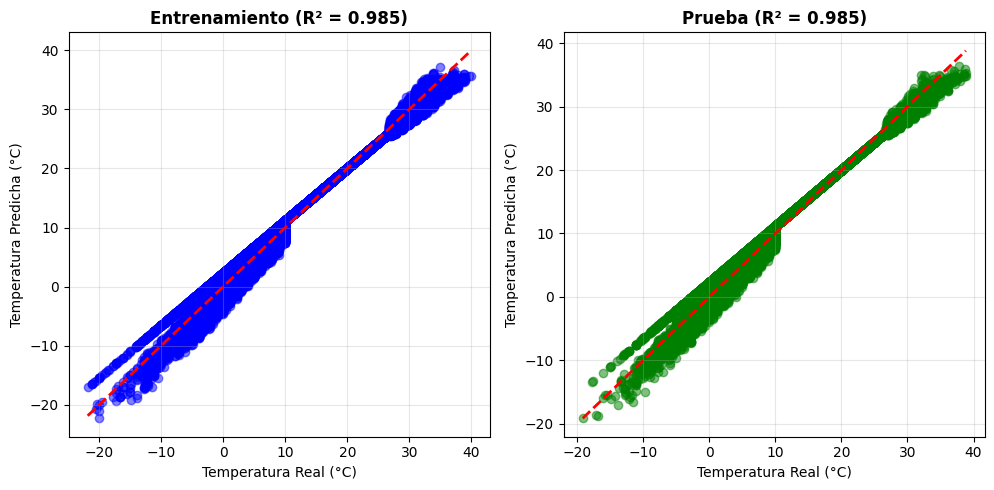

In [273]:
# Visualización de predicciones vs valores reales
plt.figure(figsize=(15, 5))

# Gráfica 1: Entrenamiento
plt.subplot(1, 3, 1)
plt.scatter(y_train_original, y_train_pred_original, alpha=0.5, color='blue')
plt.plot([y_train_original.min(), y_train_original.max()], 
         [y_train_original.min(), y_train_original.max()], 'r--', lw=2)
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.title(f'Entrenamiento (R² = {train_r2:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

# Gráfica 2: Prueba
plt.subplot(1, 3, 2)
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, color='green')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Temperatura Real (°C)')
plt.ylabel('Temperatura Predicha (°C)')
plt.title(f'Prueba (R² = {test_r2:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()